# アタポン
* アタポンのデータに絞る
* ちょうど毎月開催されてるので、月次にしてみる
  * 「月の中で何日に開催された」とかは一旦考慮しない
* イベント期間(h)を使って、時変係数モデルにしてみる

## インポート

In [1]:
import numpy as np
import pandas as pd
import pickle
import datetime
from datetime import timedelta
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font=['IPAMincho'])

import pystan

## イベントデータ読み込み

In [2]:
input_dir = '../event_data/'

In [3]:
df = pd.read_pickle(input_dir + 'a3_output_df.pkl')
df = df[df['形式'] == 'アタポン'].set_index('日付')
df

,イベント,2001位,形式,属性,期間
日付,,,,,
2015-09-25,アタシポンコツアンドロイド,78330,アタポン,NaN,249.0
2015-10-19,Nation Blue,67627,アタポン,NaN,198.0
2015-11-20,Orange Sapphire,42944,アタポン,NaN,150.0
2015-12-18,Snow Wings,50954,アタポン,NaN,222.0
2016-01-20,パステルピンクな恋,43854,アタポン,NaN,174.0
2016-02-18,オルゴールの小箱,56737,アタポン,NaN,174.0
2016-03-20,絶対特権主張しますっ！,51353,アタポン,NaN,174.0
2016-04-19,つぼみ,47907,アタポン,NaN,174.0
2016-05-19,明日また会えるよね,58517,アタポン,NaN,198.0


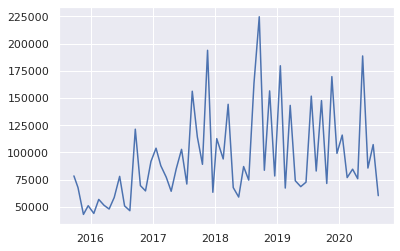

In [4]:
# プロットしてみる
fig = plt.figure()
ax = fig.add_subplot(111)
x = df.index
y = df.loc[:, '2001位']
ax.plot(x, y)
plt.show()

## ローカルレベル+時系変数モデル

### stanデータ準備

In [5]:
# データ（辞書型）
dat = {
    'T':       len(df),         # 全日付の日数
    'len':     df['期間'].tolist(),   # イベント期間(h)
    'y':       df['2001位'].tolist(), # 観測値
}

In [10]:
# Stanコード
model = """
data {
  int T;         // データ取得期間の長さ
  vector[T] len; // イベント期間(h)
  vector[T] y;   // 観測値
}
parameters {
  vector[T] b_len;   // lenの係数
  vector[T] mu;      // 水準成分の推定値
  real<lower=0> s_t; // ev_lenの係数の変化を表す標準偏差
  real<lower=0> s_w; // 水準成分の変動の大きさを表す標準偏差
  real<lower=0> s_v; // 観測誤差の標準偏差
}
transformed parameters {
  vector[T] alpha;
  for(i in 1:T){
    alpha[i] = mu[i] + b_len[i] * len[i];
  }
}
model {
  for(i in 2:T){
    mu[i] ~ normal(mu[i-1], s_w);
    b_len[i] ~ normal(b_len[i-1], s_t);
    y[i] ~ normal(alpha[i], s_v);
  }
}
"""

### Stan実行

In [11]:
# コンパイル
%time stm = pystan.StanModel(model_code=model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_63f10cc5788edc3d10735e32da228d2c NOW.
C:\Users\kazuy\Anaconda3\lib\site-packages\Cython\Compiler\Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: C:\Users\kazuy\AppData\Local\Temp\tmpiq_t4c52\stanfit4anon_model_63f10cc5788edc3d10735e32da228d2c_2444148928056904524.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


Wall time: 22.5 s


In [12]:
# パラメータ設定
n_itr = 8000
n_warmup = n_itr - 1000
chains = 3

In [13]:
# 計算
%time fit = stm.sampling(data=dat, iter=n_itr, chains=chains, n_jobs=-1, warmup=n_warmup, algorithm="NUTS", verbose=False)

C:\Users\kazuy\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


Wall time: 48.3 s


In [14]:
# fit後のファイル保存
save_dir = '../event_data/'
with open(save_dir + 'c4_1_stan.pickle', mode="wb") as f:
    pickle.dump(fit, f)

C:\Users\kazuy\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  after removing the cwd from sys.path.


### 結果確認

In [15]:
# 読み込み
with open(save_dir + 'c4_1_stan.pickle', mode="rb") as f:
    fit = pickle.load(f)

In [16]:
fit

Inference for Stan model: anon_model_63f10cc5788edc3d10735e32da228d2c.
3 chains, each with iter=8000; warmup=7000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=3000.

            mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
b_len[0]  -149.6   49.43  369.9 -897.0 -392.1 -138.3 117.47 503.59     56   1.06
b_len[1]  -148.7   49.57  367.6 -885.0 -388.1 -141.2 121.22 514.51     55   1.06
b_len[2]  -150.8   49.45 366.72 -882.9 -390.7 -145.9 118.73 502.56     55   1.06
b_len[3]  -150.0   49.58 364.37 -883.5 -386.1 -142.4 115.95 510.66     54   1.06
b_len[4]  -150.2   49.19 364.78 -881.1 -388.2 -142.6 116.49 520.09     55   1.06
b_len[5]  -147.2   49.09 364.09 -880.0 -380.9 -134.5 120.67  498.0     55   1.06
b_len[6]  -144.3   48.99  363.3 -882.8 -378.9 -136.6 123.28 508.83     55   1.06
b_len[7]  -140.1   48.93 362.85 -878.9 -375.4 -130.8 123.61 512.61     55   1.06
b_len[8]  -134.1    48.7  361.2 -867.4 -363.0 -127.1  127.4 514.75     55   1.06
b

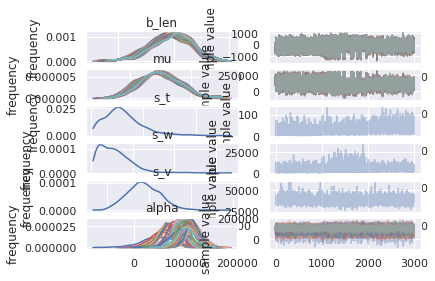

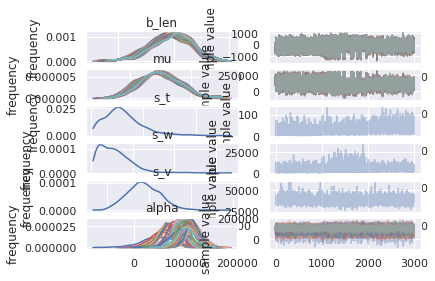

In [17]:
fit.plot()

In [20]:
#x軸
X = df.index

#結果を抽出
ms = fit.extract() 

#muの事後平均を算出
mu_mean = ms['mu'].mean(axis=0)

#95パーセンタイルを抽出
mu_5 = np.array(pd.DataFrame(ms['mu']).apply(lambda x: np.percentile(x, 5), axis=0))
mu_95 = np.array(pd.DataFrame(ms['mu']).apply(lambda x: np.percentile(x, 95), axis=0))

# alpha
# 事後平均
alpha_mean = ms['alpha'].mean(axis=0)
# #95パーセンタイル抽出
alpha_5 = np.array(pd.DataFrame(ms['alpha']).apply(lambda x: np.percentile(x, 5), axis=0))
alpha_95 = np.array(pd.DataFrame(ms['alpha']).apply(lambda x: np.percentile(x, 95), axis=0))

# b_ev_len
# 事後平均
b_len_mean = ms['b_len'].mean(axis=0)
# #95パーセンタイル抽出
b_len_5 = np.array(pd.DataFrame(ms['b_len']).apply(lambda x: np.percentile(x, 5), axis=0))
b_len_95 = np.array(pd.DataFrame(ms['b_len']).apply(lambda x: np.percentile(x, 95), axis=0))

# b_ev_lenの効果を算出
len_effects = b_len_mean*df['期間']
len_effects_5 = b_len_5*df['期間']
len_effects_95 = b_len_95*df['期間']

INFO:numexpr.utils:NumExpr defaulting to 6 threads.


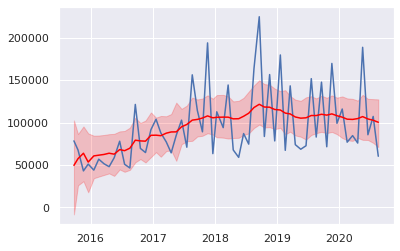

In [22]:
# alpha
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(X, df['2001位'], label='observed')
ax.plot(X, alpha_mean, label='predicted', c='red')
plt.fill_between(X, alpha_5, alpha_95, color='red', alpha=0.2)
plt.show()

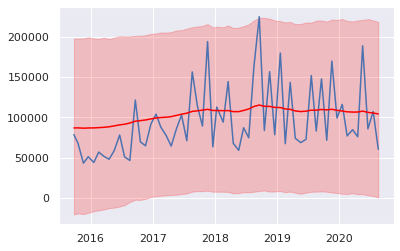

In [24]:
# mu
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(X, df['2001位'], label='observed')
ax.plot(X, mu_mean, label='trend', c='red')
plt.fill_between(X, mu_5, mu_95, color='red', alpha=0.2)
# plt.legend(loc='upper left', borderaxespad=0, fontsize=15)
plt.show()

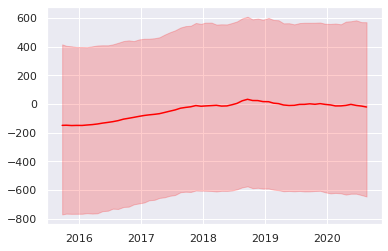

In [25]:
# b_ev_len
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(X, b_ev_len_mean, c='red')
plt.fill_between(X, b_ev_len_5, b_ev_len_95, color='red', alpha=0.2)
plt.show()

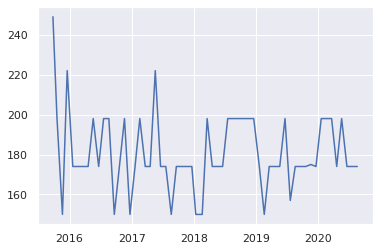

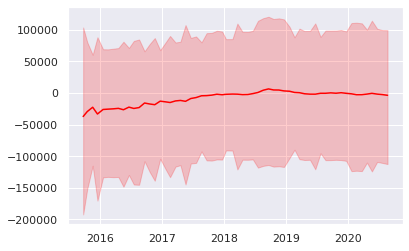

In [26]:
# b_ev_lenの効果を算出
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X, df['期間'])
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X, len_effects, c='red')
plt.fill_between(X, len_effects_5, len_effects_95, color='red', alpha=0.2)
plt.show()

## ローカル線形トレンド+時系変数モデル

### stanデータ準備

In [27]:
# データ（辞書型）
dat = {
    'T':       len(df),         # 全日付の日数
    'len':     df['期間'].tolist(),   # イベント期間(h)
    'y':       df['2001位'].tolist(), # 観測値
}

In [28]:
# Stanコード
model = """
data {
  int T;         // データ取得期間の長さ
  vector[T] len; // イベント期間(h)
  vector[T] y;   // 観測値
}
parameters {
  vector[T] b_len;   // lenの係数
  vector[T] mu;      // 水準+ドリフト成分の推定値
  vector[T] delta;   // ドリフト成分の推定値
  real<lower=0> s_w; // 水準成分の変動の大きさを表す標準偏差
  real<lower=0> s_z; // ドリフト成分の変動の大きさを表す標準偏差
  real<lower=0> s_v; // 観測誤差の標準偏差
  real<lower=0> s_t; // lenの係数の変化を表す標準偏差
}
transformed parameters {
  vector[T] alpha;
  for(i in 1:T){
    alpha[i] = mu[i] + b_len[i] * len[i];
  }
}
model {
  for(i in 2:T){
    mu[i] ~ normal(mu[i-1] + delta[i-1], s_w);
    delta[i] ~ normal(delta[i-1], s_z);
    b_len[i] ~ normal(b_len[i-1], s_t);
    y[i] ~ normal(alpha[i], s_v);
  }
}
"""

### Stan実行

In [29]:
# コンパイル
%time stm = pystan.StanModel(model_code=model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_f33c2889669abe2a05c72aa58f80b244 NOW.
C:\Users\kazuy\Anaconda3\lib\site-packages\Cython\Compiler\Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: C:\Users\kazuy\AppData\Local\Temp\tmp4f8i0i6u\stanfit4anon_model_f33c2889669abe2a05c72aa58f80b244_566856350687641405.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


Wall time: 22.5 s


In [35]:
# パラメータ設定
n_itr = 4000
n_warmup = n_itr - 1000
chains = 3

In [36]:
# 計算
%time fit = stm.sampling(data=dat, iter=n_itr, chains=chains, n_jobs=-1, warmup=n_warmup, algorithm="NUTS", verbose=False)

Wall time: 1min


In [37]:
# fit後のファイル保存
save_dir = '../event_data/'
with open(save_dir + 'c4_2_stan.pickle', mode="wb") as f:
    pickle.dump(fit, f)

C:\Users\kazuy\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  after removing the cwd from sys.path.


### 結果確認

In [38]:
# 読み込み
with open(save_dir + 'c4_2_stan.pickle', mode="rb") as f:
    fit = pickle.load(f)

In [39]:
fit

Inference for Stan model: anon_model_f33c2889669abe2a05c72aa58f80b244.
3 chains, each with iter=4000; warmup=3000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=3000.

            mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
b_len[0]  -81.38   23.01 336.54 -798.4 -293.5 -69.68 145.02 576.65    214   1.02
b_len[1]  -81.02   22.81 333.65 -776.0 -291.6 -66.04 141.26 572.28    214   1.02
b_len[2]   -85.5   23.06 333.34 -791.4 -292.2 -70.59 132.69 559.03    209   1.02
b_len[3]  -85.47   23.64  328.4 -791.9 -293.0 -70.94 127.99 551.98    193   1.02
b_len[4]  -87.28    23.8 330.66 -793.7 -293.1 -73.39 124.93 545.02    193   1.02
b_len[5]  -86.23   23.76 330.08 -797.7 -288.5 -72.21 125.67 551.98    193   1.02
b_len[6]   -85.3   23.97 329.52 -785.2 -297.3 -67.36 122.17 545.78    189   1.02
b_len[7]  -84.09   23.96 326.78 -780.9 -292.4  -62.6 126.79 542.98    186   1.02
b_len[8]  -80.55   23.71 323.31 -749.0 -287.3 -65.41 129.83  544.0    186   1.02
b

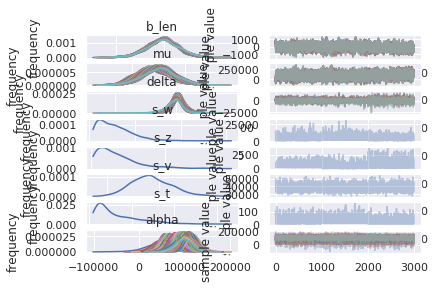

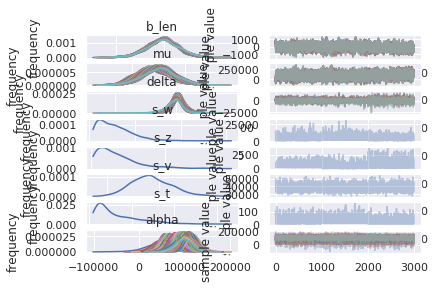

In [40]:
fit.plot()

In [41]:
#x軸
X = df.index

#結果を抽出
ms = fit.extract() 

#muの事後平均を算出
mu_mean = ms['mu'].mean(axis=0)

#95パーセンタイルを抽出
mu_5 = np.array(pd.DataFrame(ms['mu']).apply(lambda x: np.percentile(x, 5), axis=0))
mu_95 = np.array(pd.DataFrame(ms['mu']).apply(lambda x: np.percentile(x, 95), axis=0))

# delta
# 事後平均
delta_mean = ms['delta'].mean(axis=0)
# #95パーセンタイル抽出
delta_5 = np.array(pd.DataFrame(ms['delta']).apply(lambda x: np.percentile(x, 5), axis=0))
delta_95 = np.array(pd.DataFrame(ms['delta']).apply(lambda x: np.percentile(x, 95), axis=0))

# alpha
# 事後平均
alpha_mean = ms['alpha'].mean(axis=0)
# #95パーセンタイル抽出
alpha_5 = np.array(pd.DataFrame(ms['alpha']).apply(lambda x: np.percentile(x, 5), axis=0))
alpha_95 = np.array(pd.DataFrame(ms['alpha']).apply(lambda x: np.percentile(x, 95), axis=0))

# b_ev_len
# 事後平均
b_len_mean = ms['b_len'].mean(axis=0)
# #95パーセンタイル抽出
b_len_5 = np.array(pd.DataFrame(ms['b_len']).apply(lambda x: np.percentile(x, 5), axis=0))
b_len_95 = np.array(pd.DataFrame(ms['b_len']).apply(lambda x: np.percentile(x, 95), axis=0))

# b_ev_lenの効果を算出
len_effects = b_len_mean*df['期間']
len_effects_5 = b_len_5*df['期間']
len_effects_95 = b_len_95*df['期間']

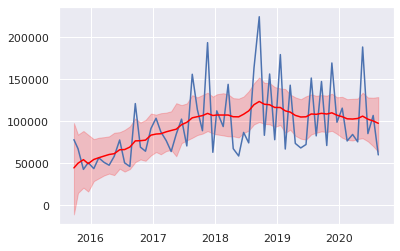

In [42]:
# alpha
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(X, df['2001位'], label='observed')
ax.plot(X, alpha_mean, label='predicted', c='red')
plt.fill_between(X, alpha_5, alpha_95, color='red', alpha=0.2)
plt.show()

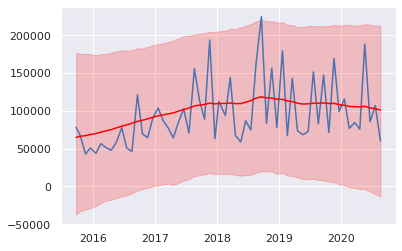

In [43]:
# mu
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(X, df['2001位'], label='observed')
ax.plot(X, mu_mean, label='trend', c='red')
plt.fill_between(X, mu_5, mu_95, color='red', alpha=0.2)
# plt.legend(loc='upper left', borderaxespad=0, fontsize=15)
plt.show()

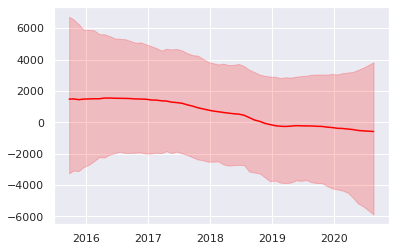

In [44]:
# delta
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(X, delta_mean, label='predicted trend', c='red')
plt.fill_between(X, delta_5, delta_95, color='red', alpha=0.2)
plt.show()

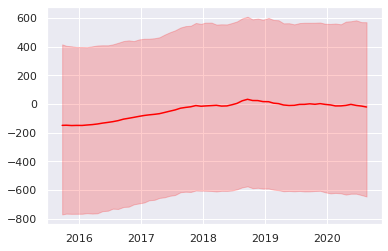

In [45]:
# b_ev_len
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(X, b_ev_len_mean, c='red')
plt.fill_between(X, b_ev_len_5, b_ev_len_95, color='red', alpha=0.2)
plt.show()

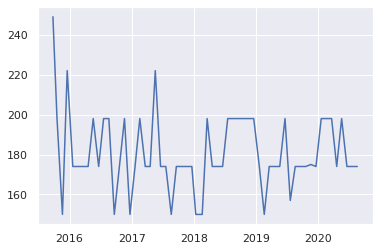

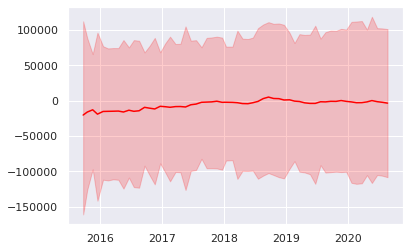

In [46]:
# b_ev_lenの効果を算出
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X, df['期間'])
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X, len_effects, c='red')
plt.fill_between(X, len_effects_5, len_effects_95, color='red', alpha=0.2)
plt.show()

## 所感

* やはり、まだうまくフィットしない
* 期間の係数がマイナス寄りになっている
  * 普通に考えて、実際はそんなことはないはず（「期間が短いほどポイントが稼げる」とは思えない）
  * 他の要因による変化に引っ張られていると思われる
* 他に関係しそうな要素として思い浮かんだもの羅列
  * イベントごとの要素
    * ランキング報酬のアイドル
  * トレンドに含まれそうな要素
    * キャラが増えたことで放置編成組めるようになった
      * グランドライブ実装での時間効率UP
  * イベント報酬の一番良いやつもらえるボーダーだから2001位を選んだけど、1位スコアのほうが予想簡単そうだったｗ（時間を目一杯使って走った場合の物理的な限界値）